# ANOVA Example: Effect of Teaching Methods on Student Performance


## Hypothetical Scenario

In this example, we are testing the effectiveness of three different teaching methods on student exam scores. 

The three teaching methods are:
- **Group A**: Lecture-only
- **Group B**: Interactive activities
- **Group C**: Mixed (lectures and activities)

We want to know if there are statistically significant differences in exam scores across these three groups. 

### Objective

To use ANOVA to check if the teaching method has a significant effect on exam scores.

### Dependencies

Let's start by importing the necessary libraries.


In [5]:

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots display within the notebook
%matplotlib inline


### Generate a Random Dataset

In [2]:

# Seed for reproducibility
np.random.seed(0)

# Create random scores for each teaching method
scores_A = np.random.normal(70, 10, 30)  # Lecture-only group
scores_B = np.random.normal(75, 10, 30)  # Interactive activities group
scores_C = np.random.normal(80, 10, 30)  # Mixed methods group

# Combine data into a DataFrame
data = pd.DataFrame({
    'Score': np.concatenate([scores_A, scores_B, scores_C]),
    'Method': ['Lecture-only'] * 30 + ['Interactive'] * 30 + ['Mixed'] * 30
})

# Display the first few rows of the dataset
data.head(50)


,Score,Method
0,87.640523,Lecture-only
1,74.001572,Lecture-only
2,79.787380,Lecture-only
3,92.408932,Lecture-only
4,88.675580,Lecture-only
5,60.227221,Lecture-only
6,79.500884,Lecture-only
7,68.486428,Lecture-only
8,68.967811,Lecture-only
9,74.105985,Lecture-only


### Visualizing the Data

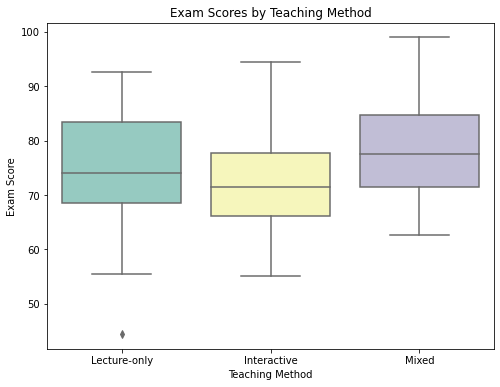

In [3]:

# Boxplot to visualize the distribution of scores across teaching methods
plt.figure(figsize=(8, 6))
sns.boxplot(x='Method', y='Score', data=data, palette="Set3")
plt.title('Exam Scores by Teaching Method')
plt.xlabel('Teaching Method')
plt.ylabel('Exam Score')
plt.show()


### Performing ANOVA

In [4]:

# Define the formula and fit the model
formula = 'Score ~ C(Method)'
model = ols(formula, data).fit()

# Generate the ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
C(Method),663.361108,2.0,3.341461,0.039981
Residual,8635.806619,87.0,NaN,NaN



## Interpreting the Results

In the ANOVA table, focus on the **PR(>F)** column (p-value). If this value is below our significance threshold (commonly 0.05), we can reject the null hypothesis.

### Interpretation:
- If the p-value for the teaching method is **less than 0.05**, we conclude that there are significant differences in exam scores based on the teaching method.
- If the p-value is **greater than 0.05**, we fail to reject the null hypothesis, meaning we don't have enough evidence to claim differences in scores between groups.



## Summary

In this example, we used ANOVA to test the impact of different teaching methods on exam performance. We looked at a dataset of exam scores, split by three teaching methods, and checked if the differences in mean scores were statistically significant.

This analysis is essential in educational research where the effectiveness of teaching styles is often analyzed.



#other tests to check which has the highest mean#use  post hoc tests eg turke tests,dunnet tests